[View in Colaboratory](https://colab.research.google.com/github/redcican/Machine-Learning-Basic/blob/master/01_Introduction_to_Decision_Tree.ipynb)

## Implementing a Decision Tree with simple example

In [0]:
import pandas as pd
from sklearn import tree

download the dataset

In [7]:
#@title
!wget https://raw.githubusercontent.com/ishansharma/decision_trees_tutorial/master/data.csv

--2018-04-30 08:31:59--  https://raw.githubusercontent.com/ishansharma/decision_trees_tutorial/master/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 765 [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]     765  --.-KB/s    in 0s      

2018-04-30 08:31:59 (65.4 MB/s) - ‘data.csv.1’ saved [765/765]



In [8]:
data = pd.read_csv('data.csv')
data.head()

,Brand,Color,Class
0,Snickers,Red,1
1,Snickers,Red,1
2,Snickers,Red,1
3,Snickers,Red,1
4,Snickers,Red,1


Attribute "Class" column decides if want to eat a chocolate or not. 1 means yes,0 otherwise

In [0]:
data['Color'] = data['Color'].map({'Red':0,'Blue':1})
data['Brand'] = data['Brand'].map({'Snickers':0,'Kit Kat':1})

In [12]:
data.head(n=20)

,Brand,Color,Class
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [0]:
predictors = ['Color','Brand']
X = data[predictors]
Y = data.Class

In [0]:
decisionTreeClassifier = tree.DecisionTreeClassifier(criterion='entropy')
dTree = decisionTreeClassifier.fit(X,Y)

In [15]:
dotData = tree.export_graphviz(dTree, out_file=None)
print(dotData)

digraph Tree {
node [shape=box] ;
0 [label="X[1] <= 0.5\nentropy = 0.881\nsamples = 50\nvalue = [35, 15]"] ;
1 [label="X[0] <= 0.5\nentropy = 0.811\nsamples = 20\nvalue = [5, 15]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="entropy = 0.0\nsamples = 15\nvalue = [0, 15]"] ;
1 -> 2 ;
3 [label="entropy = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
1 -> 3 ;
4 [label="entropy = 0.0\nsamples = 30\nvalue = [30, 0]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


visualize the Tree

In [16]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving visu.PNG to visu.PNG
User uploaded file "visu.PNG" with length 59378 bytes


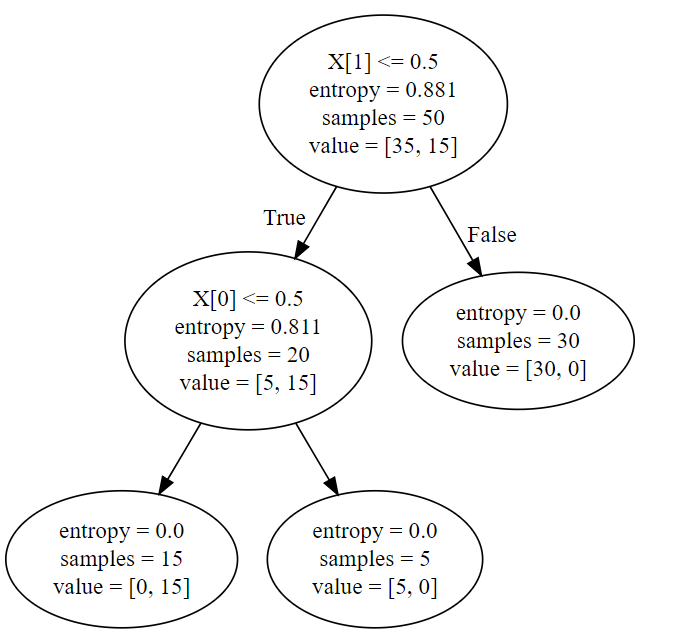

In [19]:
from IPython.display import Image
Image('visu.PNG')

make a prediction

In [20]:
print(dTree.predict([[1,1]]))

[0]


In [21]:
print(dTree.predict([[0,0]]))

[1]
